# Helium Neon Laser

## initial imports

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy.constants as con
import uncertainties as un

In [38]:
# normalize
def normalize(arr, t_min, t_max):
    arr = arr.to_numpy()
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
def simple_norm(arr):
    arr = arr.to_numpy()
    norm_arr = []
    diff = 1
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr)
        norm_arr.append(temp)
    return norm_arr
def norm2(arr):
    arr = arr.to_numpy()
    diff_arr = max(arr) - min(arr)   
    return arr/diff_arr

## 2. Abhängigkeit der Ausgangsleistung von der Eingangsleistung

Durch Variation des Pumpstromes ist der optimale Arbeitsbereich des Lasers zu ermitteln. Das Ersetzten des Planspiegels durch den Auskoppelspiegel füh
rt zu einer wesentlich höheren Ausgangsleistung und zu einer anderen Eingans-Ausgangsleistungs- Charakteristik. Die Hochspannung der Gasentladung beträgt 2.0 ± 0.1 kV.

### load data

In [39]:
mr2 = pd.read_table("HeNe-Laser/data/HeNe-Laser - 2.2 Pumpleistung.tsv",decimal=",")
mr2

,Stromstärke I in mA,uI (rechtecksverteilung),Int Planar uW,uPp,int Auskopl in mW,uPa,int Auskopl2 in mW,uPa2
0,5.0,0.086603,43.5,0.6,2.71,0.01,3.05,0.01
1,5.1,0.086603,44.2,0.6,2.72,0.01,3.10,0.01
2,5.2,0.086603,44.9,0.6,2.75,0.01,3.13,0.01
3,5.3,0.086603,45.6,0.6,2.76,0.01,3.16,0.01
4,5.4,0.086603,46.2,0.6,2.80,0.01,3.18,0.01
5,5.5,0.086603,46.8,0.6,2.81,0.01,3.19,0.01
6,5.6,0.086603,47.3,0.6,2.81,0.01,3.23,0.01
7,5.7,0.086603,47.7,0.6,2.84,0.01,3.24,0.01
8,5.8,0.086603,48.2,0.6,2.84,0.01,3.24,0.01
9,5.9,0.086603,48.8,0.6,2.84,0.01,3.25,0.01


In [40]:
Ia = np.empty(0)
for n,u in zip(mr2["Stromstärke I in mA "],mr2["uI (rechtecksverteilung)"]):
    Ia = np.append(Ia,un.ufloat(n,u))
V = un.ufloat(2,0.1)
Pa = Ia * V
uPa = np.empty(0)
for x in Pa:
    uPa = np.append(uPa,x.s)

In [41]:
Pa,uPa

(array([10.0+/-0.5291502622139368, 10.2+/-0.5386093203808101,
        10.4+/-0.5480875842427724, 10.6+/-0.5575840743789928,
        10.8+/-0.5670978751512635, 11.0+/-0.5766281297344746,
        11.2+/-0.5861740355910333, 11.4+/-0.5957348403451641,
        11.6+/-0.6053098380177527, 11.8+/-0.614898365586605,
        12.0+/-0.624499799840703, 12.2+/-0.6341135545003577,
        12.4+/-0.6437390775780807, 12.6+/-0.6533758489576104,
        12.8+/-0.6630233781708442, 13.0+/-0.6726812023544869], dtype=object),
 array([0.52915026, 0.53860932, 0.54808758, 0.55758407, 0.56709788,
        0.57662813, 0.58617404, 0.59573484, 0.60530984, 0.61489837,
        0.6244998 , 0.63411355, 0.64373908, 0.65337585, 0.66302338,
        0.6726812 ]))

### plots

In [42]:
def lin_fit(x,m,c):
    return m*x + c
x1 = np.linspace(9.8,12.5,500)

[3.39999999 9.52000015] [0.05773502 0.60066626]


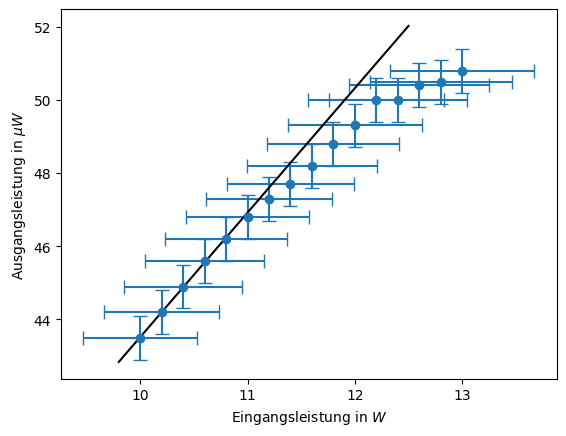

In [43]:
# Planarspiegel
x , y = mr2["Stromstärke I in mA "]*2,mr2["Int Planar uW"]
plt.errorbar(x,y,xerr=uPa,yerr=mr2["uPp"],fmt='o', capsize=5)

c, cov = curve_fit(lin_fit,x[:5],y[:5])
perr = np.sqrt(np.diag(cov))
print(c,perr)
y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,c='k')

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel("Ausgangsleistung in $\mu W$")
plt.savefig("HeNe-Laser/output/2-Planar.svg")

[0.11       1.60399996] [0.01414214 0.14713259]


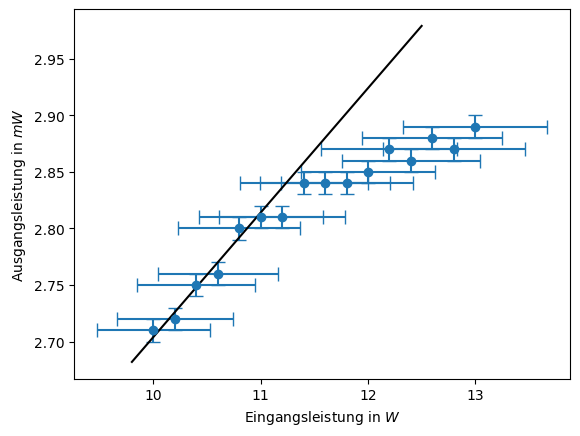

In [44]:
# Auskoppelspiegel
y = mr2["int Auskopl in mW"]
plt.errorbar(x,y,xerr=uPa,yerr=mr2["uPa"],fmt='o', capsize=5)

c, cov = curve_fit(lin_fit,x[:5],y[:5])
perr = np.sqrt(np.diag(cov))
print(c,perr)
y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,c='k')

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel("Ausgangsleistung in $mW$")
plt.savefig("HeNe-Laser/output/2-Auskoppl.svg")

[0.16       1.45999997] [0.01527525 0.15892137]


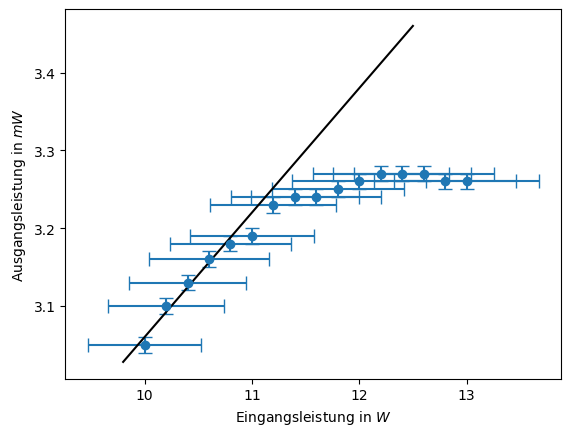

In [45]:
# Auskoppelspiegel versuch 2
y = mr2["int Auskopl2 in mW"]
plt.errorbar(x,y,xerr=uPa,yerr=mr2["uPa2"],fmt='o', capsize=5)

c, cov = curve_fit(lin_fit,x[:5],y[:5])
perr = np.sqrt(np.diag(cov))
print(c,perr)
y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,c='k')

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel("Ausgangsleistung in $mW$")
plt.savefig("HeNe-Laser/output/2-Auskoppl2.svg")

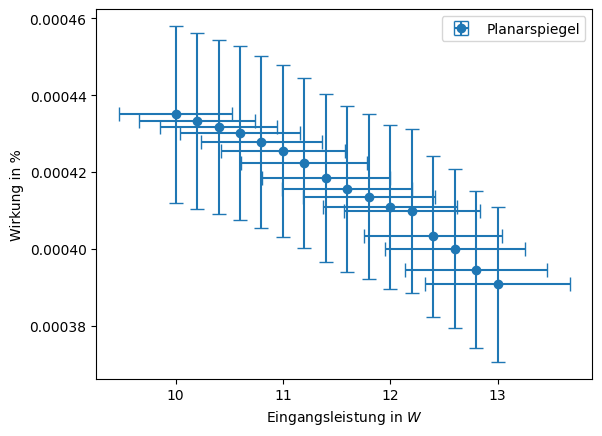

In [46]:
# Planarspiegel
y = mr2["Int Planar uW"]/(mr2["Stromstärke I in mA "]*2)*1e-4
yerr= np.sqrt((y/x * uPa)**2 + (y/mr2["Int Planar uW"] *mr2["uPp"]*1e-4)**2)
plt.errorbar(x,y,xerr=uPa,yerr=yerr,fmt='o', capsize=5,label="Planarspiegel")

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel(r"Wirkung in %")
plt.legend()
plt.savefig("HeNe-Laser/output/2-Planar-Wirkung.svg")

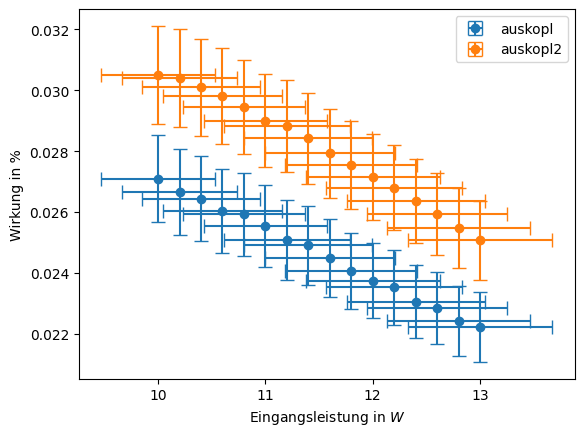

In [47]:
# Auskopl
y = mr2["int Auskopl in mW"]/(mr2["Stromstärke I in mA "]*2)*1e-1
yerr= np.sqrt((y/x * uPa)**2 + (y/mr2["int Auskopl in mW"] *mr2["uPa"]*1e-1)**2)
plt.errorbar(x,y,xerr=uPa,yerr=yerr,fmt='o', capsize=5,label="auskopl")

# Auskopl 2
y = mr2["int Auskopl2 in mW"]/(mr2["Stromstärke I in mA "]*2)*1e-1
yerr= np.sqrt((y/x * uPa)**2 + (y/mr2["int Auskopl2 in mW"] *mr2["uPa2"]*1e-1)**2)
plt.errorbar(x,y,xerr=uPa,yerr=yerr,fmt='o', capsize=5,label="auskopl2")



plt.xlabel("Eingangsleistung in $W$")
plt.ylabel(r"Wirkung in %")
plt.legend()
plt.savefig("HeNe-Laser/output/2-Auskoppl-Wirkung.svg")

## 3. Abhängigkeit der Ausgangsleistung von der Röhrenposition

### load data

In [48]:
mr3 = pd.read_table("HeNe-Laser/data/HeNe-Laser - 2.3 Röhrenposition.tsv",decimal=",")
mr3

,Röhrenpos in cm,Ausgangsleistung P in mW,uP
0,15,3.50,0.02
1,16,3.53,0.02
2,17,3.62,0.02
3,18,3.66,0.02
4,19,3.57,0.02
5,20,3.41,0.02
6,21,3.40,0.02
7,22,3.31,0.02
8,23,2.96,0.02
9,24,2.61,0.02


In [49]:
uRpos = 0.1 / (2*np.sqrt(6))
uRpos

0.020412414523193152

### plots

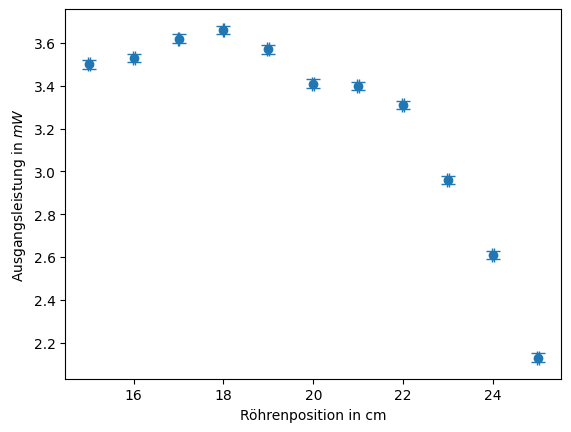

In [50]:
x,y = mr3["Röhrenpos in cm"],mr3["Ausgangsleistung P in mW"]
plt.errorbar(x,y,xerr=uRpos,yerr=mr3["uP"],fmt='o', capsize=5)

plt.xlabel("Röhrenposition in cm")
plt.ylabel("Ausgangsleistung in $mW$")
plt.savefig("HeNe-Laser/output/3-Röhrenpos.svg")

## 4. Stabilität des Resonators

### load data

In [51]:
mr4 = pd.read_table("HeNe-Laser/data/HeNe-Laser - 2.4 Stabilität.tsv",decimal=",")
mr4

,d1 in cm,P1 in uW,uP1,d2 in cm,P2 in uW,uP2,d3 in cm,P3 in uW,uP3,P3 eich
0,55.0,77.0,0.6,55,101.0,0.6,55.0,8.30,0.8,1.63
1,60.0,69.0,0.6,60,99.0,0.6,60.0,7.10,0.8,0.43
2,65.0,48.1,0.6,65,95.2,0.6,65.0,7.04,0.8,0.37
3,67.0,40.5,0.6,70,92.7,0.6,67.0,6.90,0.8,0.23
4,69.0,24.1,0.6,75,75.8,0.6,67.5,6.80,0.8,0.13
5,70.0,23.4,0.6,77,56.7,0.6,68.0,6.67,0.8,0.00
6,71.0,15.5,0.6,79,29.6,0.6,NaN,NaN,NaN,NaN
7,72.0,4.2,0.6,81,18.2,0.6,NaN,NaN,NaN,NaN
8,72.5,0.0,0.6,82,9.4,0.6,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,83,0.0,0.6,NaN,NaN,NaN,NaN


In [52]:
ud = uRpos*np.sqrt(2)

### plots

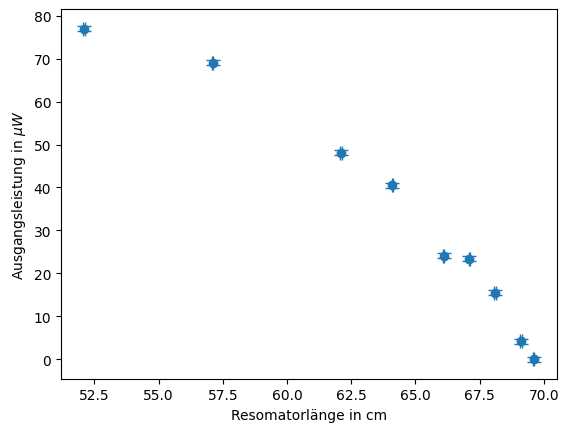

In [53]:
# R700/Plane
x,y = mr4["d1 in cm"]-2.9,mr4[" P1 in uW"]
plt.errorbar(x,y,xerr=ud,yerr=mr4["uP1"],fmt='o', capsize=5)

plt.xlabel("Resomatorlänge in cm")
plt.ylabel("Ausgangsleistung in $\mu W$")
plt.savefig("HeNe-Laser/output/4-stab-r700-plan.svg")

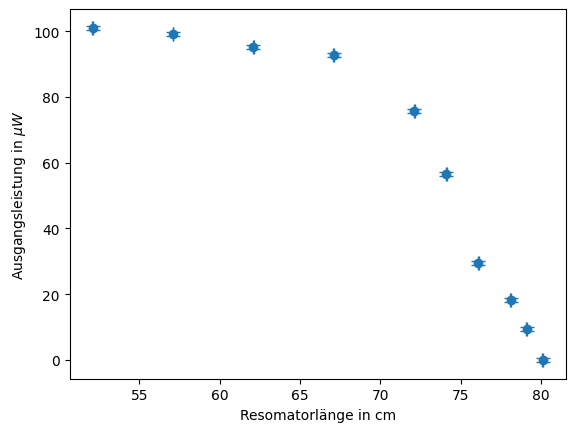

In [54]:
# R850/Plane
x,y = mr4["d2 in cm"]-2.9,mr4[" P2 in uW"]
plt.errorbar(x,y,xerr=ud,yerr=mr4["uP2"],fmt='o', capsize=5)

plt.xlabel("Resomatorlänge in cm")
plt.ylabel("Ausgangsleistung in $\mu W$")
plt.savefig("HeNe-Laser/output/4-stab-r850-plan.svg")

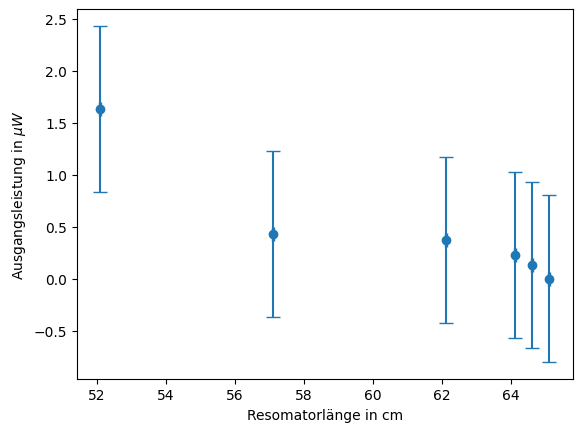

In [55]:
# R700/R850
x,y = mr4["d3 in cm"]-2.9,mr4["P3 eich"]
plt.errorbar(x,y,xerr=ud,yerr=mr4["uP3"],fmt='o', capsize=5)

plt.xlabel("Resomatorlänge in cm")
plt.ylabel("Ausgangsleistung in $\mu W$")
plt.savefig("HeNe-Laser/output/4-stab-r700-r850.svg")

## 5. Wellenlängenselektion

### load data

In [56]:
db_633 = pd.read_table("HeNe-Laser/data/633er-mode-db.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
lt_633 = pd.read_table("HeNe-Laser/data/633er-mode-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
lt_640 = pd.read_table("HeNe-Laser/data/640er-mode-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
lt_beide = pd.read_table("HeNe-Laser/data/beide-moden-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')


In [57]:
fl_ohne = pd.read_table("HeNe-Laser/data/fluoreszenz-neon-(ohne-lasing).txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
fl_db_633 = pd.read_table("HeNe-Laser/data/fluoreszenz-db-633.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
fl_lt_633 = pd.read_table("HeNe-Laser/data/fluoreszenz-littow-633.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')
fl_lt_beide = pd.read_table("HeNe-Laser/data/fluoreszenz-littow-beide.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None,engine='python')

### peaks

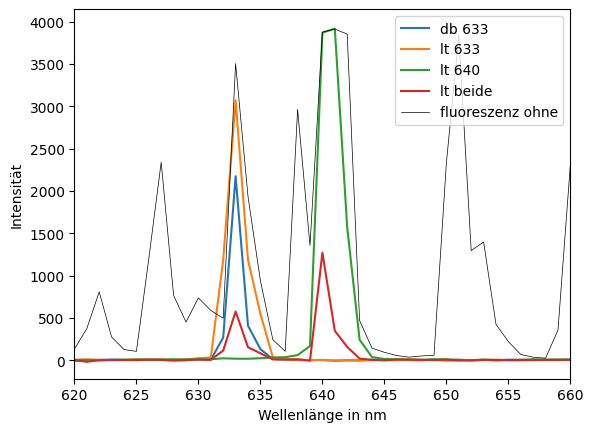

In [58]:
plt.plot(db_633[0],db_633[1],label='db 633')
plt.plot(lt_633[0],lt_633[1],label='lt 633')
plt.plot(lt_640[0],lt_640[1],label='lt 640')
plt.plot(lt_beide[0],lt_beide[1],label='lt beide')
plt.plot(fl_ohne[0],fl_ohne[1],label='fluoreszenz ohne',c='k',lw=.5)

plt.xlim(620,660)
plt.legend()
plt.xlabel("Wellenlänge in nm")
plt.ylabel("Intensität")
# gleiche messeinstellungen?
plt.savefig("HeNe-Laser/output/5-peaks.svg")

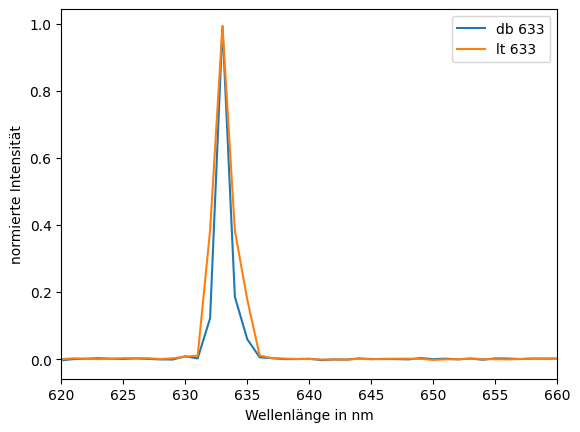

In [59]:
plt.plot(db_633[0],norm2(db_633[1]),label='db 633')
plt.plot(lt_633[0],norm2(lt_633[1]),label='lt 633')
# plt.plot(fl_ohne[0],fl_ohne[1],label='fluoreszenz ohne lasing')

plt.xlabel("Wellenlänge in nm")
plt.ylabel("normierte Intensität")

plt.xlim(620,660)
plt.legend()

### fluoreszenz

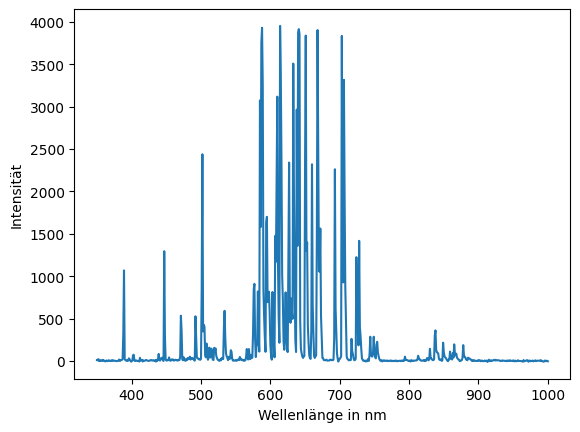

In [60]:
plt.plot(fl_ohne[0],fl_ohne[1],label='fl')

plt.xlabel("Wellenlänge in nm")
plt.ylabel("Intensität")

plt.savefig("HeNe-Laser/output/5-fluoreszenz.svg")

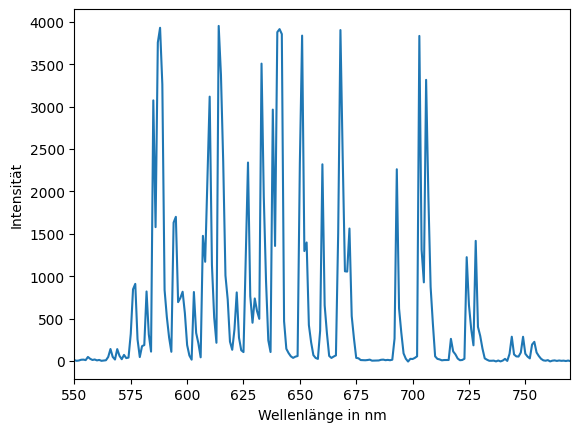

In [61]:
plt.plot(fl_ohne[0],fl_ohne[1],label='fl')
plt.xlim(550,770)

plt.xlabel("Wellenlänge in nm")
plt.ylabel("Intensität")

plt.savefig("HeNe-Laser/output/5-fluoreszenz-zoom.svg")

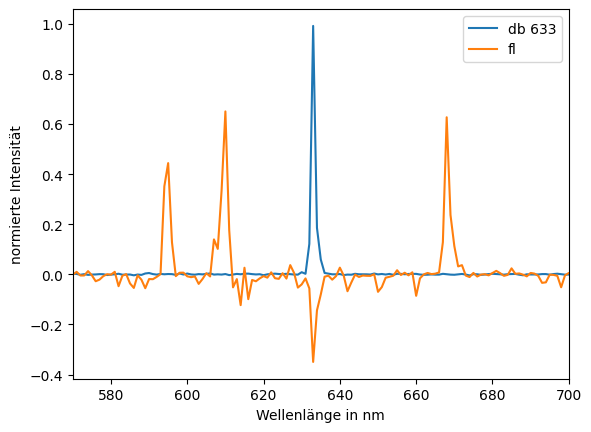

In [66]:
plt.plot(db_633[0],norm2(db_633[1]),label='db 633')
plt.plot(fl_db_633[0],norm2(fl_db_633[1]),label='fl')

plt.xlim(570,700)
plt.legend()

plt.xlabel("Wellenlänge in nm")
plt.ylabel("normierte Intensität")

plt.savefig("HeNe-Laser/output/5-fluoreszenz-db-633.svg")

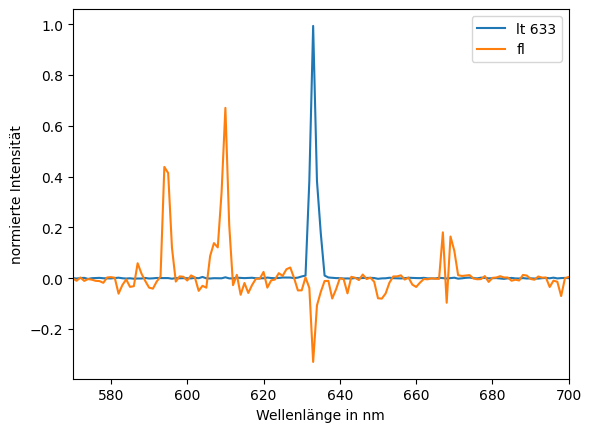

In [63]:
plt.plot(lt_633[0],norm2(lt_633[1]),label='lt 633')
plt.plot(fl_lt_633[0],norm2(fl_lt_633[1]),label='fl')

plt.xlim(570,700)
plt.legend()

plt.xlabel("Wellenlänge in nm")
plt.ylabel("normierte Intensität")

plt.savefig("HeNe-Laser/output/5-fluoreszenz-lt-633.svg")

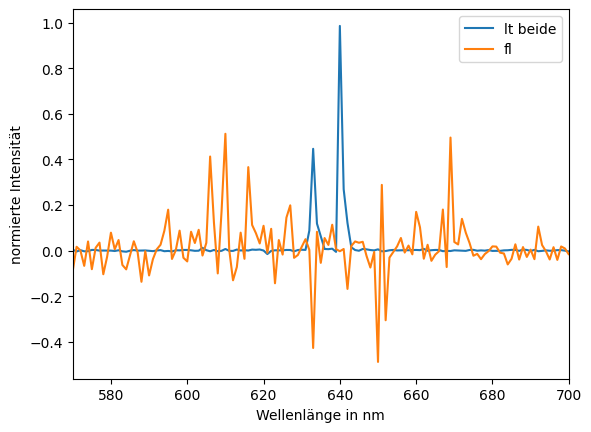

In [64]:
plt.plot(lt_beide[0],norm2(lt_beide[1]),label='lt beide')
plt.plot(fl_lt_beide[0],norm2(fl_lt_beide[1]),label='fl')

plt.xlim(570,700)
plt.legend()

plt.xlabel("Wellenlänge in nm")
plt.ylabel("normierte Intensität")

plt.savefig("HeNe-Laser/output/5-fluoreszenz-lt-beide.svg")